In [1]:
import DRLPDE_RW
import time

start = time.time()
model = DRLPDE_RW.maintraining(param='JCPexample6',
                 param_solver = 'DRLPDE_param_solver',
                 use_cuda=True)

end = time.time()
print('Time to train: {:3.0f} minutes'.format((end - start)/60))

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument mat1 in method wrapper_addmm)

In [2]:
import torch

A = torch.zeros(10).to("cpu")

In [3]:
torch.cuda.is_available()

False

In [2]:
#import DRLPDE_postprocessing

#DRLPDE_postprocessing.postprocessing(param='JCPexample2',use_model='JCPexample1')

In [3]:
import examples.JCPexample6 as DRLPDE_param
import DRLPDE_functions

boundingbox = DRLPDE_param.boundingbox
list_of_dirichlet_boundaries = DRLPDE_param.list_of_dirichlet_boundaries
list_of_periodic_boundaries = DRLPDE_param.list_of_periodic_boundaries

Domain = DRLPDE_functions.DefineDomain.Domain(False, boundingbox, 
                                                  list_of_dirichlet_boundaries,
                                                  list_of_periodic_boundaries)

num_bdry = 2**12

Xbdry, Ubdry = DRLPDE_functions.DefineDomain.generate_boundary_points(num_bdry, boundingbox, Domain.boundaries, False)

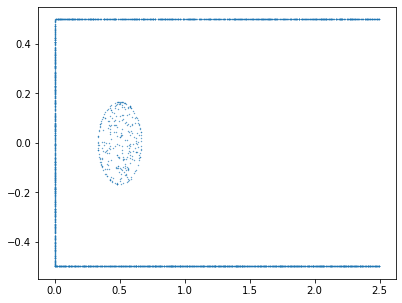

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[6.4, 5.0])
ax.scatter(Xbdry[:,0].detach().numpy(), Xbdry[:,1].detach().numpy(), s=0.1, marker='o')